In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# CNN libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2023-11-05 00:13:08.853719: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
train_data = "../data/images/dermnet/train1"
test_data = "../data/images/dermnet/test1/"

In [21]:
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 4

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 2711 images belonging to 4 classes.
Found 679 images belonging to 4 classes.


In [22]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [23]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [24]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25)
      

Epoch 1/10


2023-10-30 23:04:13.691214: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 1.3911 - accuracy: 0.4812

2023-10-30 23:05:14.084203: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 70s 1s/step - loss: 1.3911 - accuracy: 0.4812 - val_loss: 1.1860 - val_accuracy: 0.5037
Epoch 2/10
50/50 [==============================] - 56s 1s/step - loss: 1.1694 - accuracy: 0.5236
Epoch 3/10
50/50 [==============================] - 55s 1s/step - loss: 1.1235 - accuracy: 0.5374
Epoch 4/10
50/50 [==============================] - 62s 1s/step - loss: 1.0976 - accuracy: 0.5619
Epoch 5/10
50/50 [==============================] - 55s 1s/step - loss: 1.0645 - accuracy: 0.5739
Epoch 6/10
50/50 [==============================] - 60s 1s/step - loss: 1.0493 - accuracy: 0.5720
Epoch 7/10
50/50 [==============================] - 61s 1s/step - loss: 1.0034 - accuracy: 0.6006
Epoch 8/10
50/50 [==============================] - 64s 1s/step - loss: 1.0145 - accuracy: 0.5915
Epoch 9/10
50/50 [==============================] - 63s 1s/step - loss: 0.9335 - accuracy: 0.6361
Epoch 10/10
50/50 [==============================] - 64s 1s/step - loss: 0.8369 - accur

In [25]:
test_loss, test_acc = model.evaluate(validation_generator, steps=25)
print('\nTest accuracy:', test_acc)

2023-10-30 23:19:15.925259: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


25/25 [==============================] - 9s 325ms/step - loss: 1.1097 - accuracy: 0.5788

Test accuracy: 0.5787923336029053


In [13]:
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 4

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 2824 images belonging to 4 classes.
Found 809 images belonging to 4 classes.


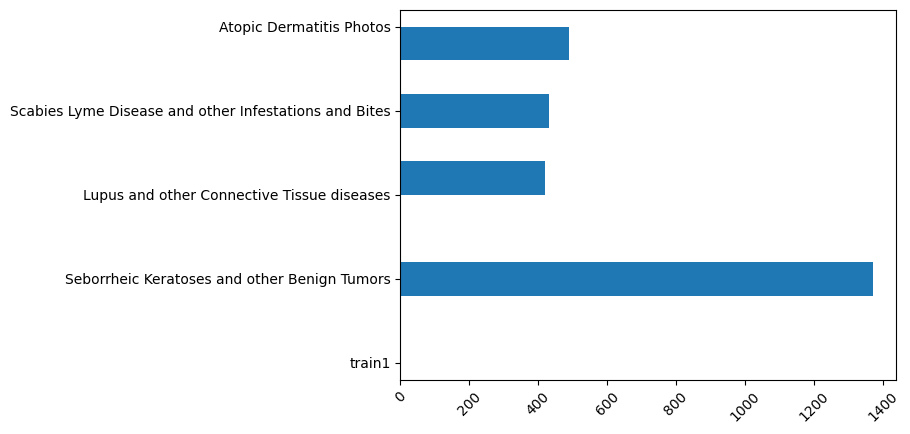

In [26]:
# Train Class distribution
train_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/train1") 
               for file in files]

test_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/test1") 
               for file in files]
classes = [os.path.basename(os.path.dirname(image_path)) for image_path in train_image_paths]
plt.hist(classes, orientation='horizontal')
plt.xticks(rotation=45)
plt.show()

In [31]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [32]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [33]:
history = model.fit(
      train_generator,
      steps_per_epoch=50, 
      epochs=10,
      validation_data=validation_generator,
      validation_steps=25
      )
      

Epoch 1/10


2023-10-31 00:09:24.917671: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - ETA: 0s - loss: 1.5036 - accuracy: 0.4369

2023-10-31 00:10:52.690378: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


50/50 [==============================] - 97s 2s/step - loss: 1.5036 - accuracy: 0.4369 - val_loss: 1.2074 - val_accuracy: 0.5052
Epoch 2/10
50/50 [==============================] - 83s 2s/step - loss: 1.2539 - accuracy: 0.4871
Epoch 3/10
50/50 [==============================] - 77s 2s/step - loss: 1.2221 - accuracy: 0.5025
Epoch 4/10
50/50 [==============================] - 84s 2s/step - loss: 1.2167 - accuracy: 0.5000
Epoch 5/10
50/50 [==============================] - 77s 2s/step - loss: 1.1788 - accuracy: 0.4997
Epoch 6/10
50/50 [==============================] - 95s 2s/step - loss: 1.1535 - accuracy: 0.5256
Epoch 7/10
50/50 [==============================] - 76s 2s/step - loss: 1.1455 - accuracy: 0.5319
Epoch 8/10
50/50 [==============================] - 82s 2s/step - loss: 1.1582 - accuracy: 0.5167
Epoch 9/10
50/50 [==============================] - 73s 1s/step - loss: 1.1258 - accuracy: 0.5531
Epoch 10/10
50/50 [==============================] - 91s 2s/step - loss: 1.0979 - accur

In [34]:
test_loss, test_acc = model.evaluate(validation_generator)
print('\nTest accuracy:', test_acc)

2023-10-31 00:31:28.310903: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


22/22 [==============================] - 7s 284ms/step - loss: 1.1017 - accuracy: 0.5464

Test accuracy: 0.5463917255401611


In [3]:
# atopic dermatitis, lupus, scabies, vasculitis
# Preprocess
input_shape = (224, 224, 3) 
num_classes = 4

train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
        test_data,
        target_size=input_shape[:2],
        batch_size=32,
        class_mode='categorical')

Found 1756 images belonging to 4 classes.
Found 441 images belonging to 4 classes.


In [4]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [5]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )
      

Epoch 1/10


2023-10-31 11:23:00.119364: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - ETA: 0s - loss: 1.6726 - accuracy: 0.2517

2023-10-31 11:24:17.960988: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - 84s 1s/step - loss: 1.6726 - accuracy: 0.2517 - val_loss: 1.3715 - val_accuracy: 0.2812
Epoch 2/10
55/55 [==============================] - 68s 1s/step - loss: 1.3702 - accuracy: 0.3263 - val_loss: 1.3673 - val_accuracy: 0.2789
Epoch 3/10
55/55 [==============================] - 56s 1s/step - loss: 1.3058 - accuracy: 0.3787 - val_loss: 1.3643 - val_accuracy: 0.3356
Epoch 4/10
55/55 [==============================] - 60s 1s/step - loss: 1.1369 - accuracy: 0.5091 - val_loss: 1.3725 - val_accuracy: 0.3379
Epoch 5/10
55/55 [==============================] - 58s 1s/step - loss: 0.8771 - accuracy: 0.6259 - val_loss: 1.7241 - val_accuracy: 0.3379
Epoch 6/10
55/55 [==============================] - 60s 1s/step - loss: 0.6156 - accuracy: 0.7426 - val_loss: 2.5246 - val_accuracy: 0.3152
Epoch 7/10
55/55 [==============================] - 64s 1s/step - loss: 0.4495 - accuracy: 0.8200 - val_loss: 2.5809 - val_accuracy: 0.3288
Epoch 8/10
55/55 [=============

In [7]:
test_loss, test_acc = model.evaluate(validation_generator)
print('\nTest accuracy:', test_acc)

2023-10-31 11:34:16.044915: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


14/14 [==============================] - 4s 262ms/step - loss: 4.1804 - accuracy: 0.3424

Test accuracy: 0.3424036204814911


In [13]:
def build_model(input_shape, num_classes):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.Flatten())
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

In [9]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# no batch notmalization
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

Epoch 1/10


2023-10-31 11:35:55.152545: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - ETA: 0s - loss: 1.6902 - accuracy: 0.2517

2023-10-31 11:37:25.982342: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - 96s 2s/step - loss: 1.6902 - accuracy: 0.2517 - val_loss: 1.3852 - val_accuracy: 0.2789
Epoch 2/10
55/55 [==============================] - 92s 2s/step - loss: 1.3850 - accuracy: 0.2779 - val_loss: 1.3841 - val_accuracy: 0.2789
Epoch 3/10
55/55 [==============================] - 94s 2s/step - loss: 1.3852 - accuracy: 0.2802 - val_loss: 1.3825 - val_accuracy: 0.2789
Epoch 4/10
55/55 [==============================] - 84s 2s/step - loss: 1.3749 - accuracy: 0.2785 - val_loss: 1.3620 - val_accuracy: 0.2902
Epoch 5/10
55/55 [==============================] - 82s 1s/step - loss: 1.3414 - accuracy: 0.3195 - val_loss: 1.3503 - val_accuracy: 0.3424
Epoch 6/10
55/55 [==============================] - 86s 2s/step - loss: 1.2993 - accuracy: 0.3912 - val_loss: 1.3403 - val_accuracy: 0.3401
Epoch 7/10
55/55 [==============================] - 84s 2s/step - loss: 1.2409 - accuracy: 0.4248 - val_loss: 1.3690 - val_accuracy: 0.3492
Epoch 8/10
55/55 [=============

In [ ]:
# no batch notmalization
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

In [14]:
model = build_model(input_shape, num_classes)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [15]:
#  batch notmalization
history = model.fit(
      train_generator,
      epochs=10,
      validation_data=validation_generator,
      )

Epoch 1/10


2023-10-31 12:35:07.570318: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - ETA: 0s - loss: 1.5411 - accuracy: 0.2887

2023-10-31 12:36:37.379220: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


55/55 [==============================] - 97s 2s/step - loss: 1.5411 - accuracy: 0.2887 - val_loss: 1.3855 - val_accuracy: 0.2744
Epoch 2/10
55/55 [==============================] - 107s 2s/step - loss: 1.4849 - accuracy: 0.2899 - val_loss: 1.3892 - val_accuracy: 0.2766
Epoch 3/10
55/55 [==============================] - 116s 2s/step - loss: 1.4610 - accuracy: 0.2819 - val_loss: 1.3836 - val_accuracy: 0.3039
Epoch 4/10
55/55 [==============================] - 103s 2s/step - loss: 1.4180 - accuracy: 0.3058 - val_loss: 1.3812 - val_accuracy: 0.3129
Epoch 5/10
55/55 [==============================] - 103s 2s/step - loss: 1.3990 - accuracy: 0.3018 - val_loss: 1.3780 - val_accuracy: 0.3084
Epoch 6/10
55/55 [==============================] - 101s 2s/step - loss: 1.3706 - accuracy: 0.3252 - val_loss: 1.3679 - val_accuracy: 0.3379
Epoch 7/10
55/55 [==============================] - 120s 2s/step - loss: 1.3942 - accuracy: 0.2990 - val_loss: 1.3855 - val_accuracy: 0.3107
Epoch 8/10
55/55 [=======

In [74]:
test_image_paths = [os.path.join(root, file) 
               for root, dirs, files in os.walk("../data/images/dermnet/test1") 
               for file in files]

test_image_names = [os.path.join(file) 
               for root, dirs, files in os.walk("../data/images/dermnet/test1") 
               for file in files]

test_labels = [os.path.join(root) 
               for root, dirs, files in os.walk("../data/images/dermnet/test1") 
               for file in files]


In [75]:
test_symps = pd.read_csv('../data/test_symptoms.csv')
test_symps


,Unnamed: 0,Path,Symptoms,Unnamed: 3
0,1,seborrheic-keratoses-smooth-121.jpg,"Brown or black growths, flat, 'pasted on' appe...",NaN
1,2,epidermal-cyst-126.jpg,"Round, flesh-colored bumps, with a central pun...",NaN
2,3,pilar-cyst-13.jpg,"Firm, flesh-colored bumps on the scalp",NaN
3,4,seborrheic-keratoses-ruff-130.jpg,"Rough, wart-like growths, brown or black",NaN
4,5,syringoma-42.jpg,"Small, flesh-colored bumps around my eyes",NaN
...,...,...,...,...
674,675,IchthosisIMG018-GP3.jpg,Dense scaling observed predominantly on the sh...,NaN
675,676,15IMG009.jpg,"Redness with minor swelling and itching, espec...",NaN
676,677,05AtopicLichenification.jpg,Elevated patches with a leathery texture obser...,NaN
677,678,10IMG006.jpg,Localized dryness with slight redness on the r...,NaN


In [76]:
test_labels = [test_label[29:] for test_label in test_labels]
test_image_paths[1:]

['../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/seborrheic-keratoses-smooth-121.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/epidermal-cyst-126.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/pilar-cyst-13.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/seborrheic-keratoses-ruff-130.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/syringoma-42.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/seborrheic-keratosis-irritated-86.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/porokeratosis-21.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/keloids-42.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumors/nevus-sebaceous-57.jpg',
 '../data/images/dermnet/test1/Seborrheic Keratoses and other Benign Tumo

In [77]:
test_labels[1:]

['Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratoses and other Benign Tumors',
 'Seborrheic Keratos

In [78]:
test_symps = test_symps[['Path','Symptoms']]
len(test_symps)

679

In [79]:
test_symps['Label'] = test_labels[1:]

/var/folders/jx/1ydmp_d53v52q1kv0yqb7rj80000gn/T/ipykernel_69611/4225995433.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_symps['Label'] = test_labels[1:]


In [80]:
test_symps

,Path,Symptoms,Label
0,seborrheic-keratoses-smooth-121.jpg,"Brown or black growths, flat, 'pasted on' appe...",Seborrheic Keratoses and other Benign Tumors
1,epidermal-cyst-126.jpg,"Round, flesh-colored bumps, with a central pun...",Seborrheic Keratoses and other Benign Tumors
2,pilar-cyst-13.jpg,"Firm, flesh-colored bumps on the scalp",Seborrheic Keratoses and other Benign Tumors
3,seborrheic-keratoses-ruff-130.jpg,"Rough, wart-like growths, brown or black",Seborrheic Keratoses and other Benign Tumors
4,syringoma-42.jpg,"Small, flesh-colored bumps around my eyes",Seborrheic Keratoses and other Benign Tumors
...,...,...,...
674,IchthosisIMG018-GP3.jpg,Dense scaling observed predominantly on the sh...,Atopic Dermatitis Photos
675,15IMG009.jpg,"Redness with minor swelling and itching, espec...",Atopic Dermatitis Photos
676,05AtopicLichenification.jpg,Elevated patches with a leathery texture obser...,Atopic Dermatitis Photos
677,10IMG006.jpg,Localized dryness with slight redness on the r...,Atopic Dermatitis Photos


In [81]:
test_symps.to_csv("../data/test_symptoms_labelled.csv")